# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [5]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

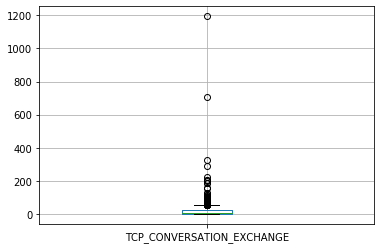

In [6]:
websites[["TCP_CONVERSATION_EXCHANGE"]].boxplot()

In [7]:
websites.shape

(1781, 21)

In [8]:
websites.isna().sum().CONTENT_LENGTH/len(websites)

0.45592363840539024

In [9]:
websites.drop(columns = "CONTENT_LENGTH", inplace = True)

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [10]:
corr_matrix = websites.corr()

In [16]:
corr_matrix.shape

(13, 13)

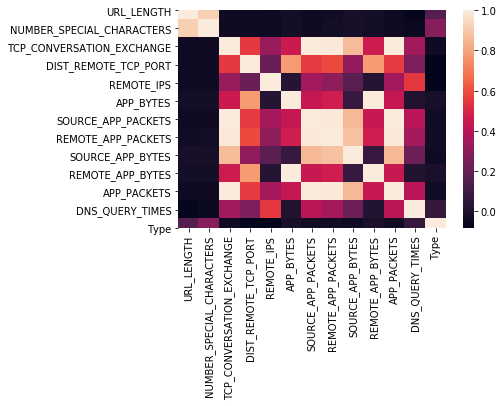

In [12]:
sns.heatmap(corr_matrix)

In [13]:
corr_matrix["TCP_CONVERSATION_EXCHANGE"] 
#highly correlated with source_app_packets, remote_app_packets, app_packets

URL_LENGTH                  -0.038407
NUMBER_SPECIAL_CHARACTERS   -0.037459
TCP_CONVERSATION_EXCHANGE    1.000000
DIST_REMOTE_TCP_PORT         0.555188
REMOTE_IPS                   0.331080
APP_BYTES                    0.457320
SOURCE_APP_PACKETS           0.997796
REMOTE_APP_PACKETS           0.990848
SOURCE_APP_BYTES             0.865580
REMOTE_APP_BYTES             0.458702
APP_PACKETS                  0.997796
DNS_QUERY_TIMES              0.349832
Type                        -0.040202
Name: TCP_CONVERSATION_EXCHANGE, dtype: float64

In [17]:
websites["TCP_CONVERSATION_EXCHANGE"].unique()

array([   7,   17,    0,   31,   57,   11,   12,   16,   25,    6,   13,
          9,   39,    8,    4,   24,   19,   10,   43,   40,    2,   84,
         65,   14,   21,   23,    5,   18,   36,   26,   46,   38,    3,
         66,   28,   33,   34,  709,   15,   32,   62,   22,   90,   76,
         48,   27,  103,   49,   94,   71,   52,  105,   42,   45,   37,
         44,   41,  208,   61,   85,    1,   68,   35,   58,   20,  288,
         30,   64,   63,   69,   60,  156,   56,  101,   51,   29,   83,
        157,   53,  185,   47,   55,   70,   50,  127,   74,  125,  197,
        113,   80,  226, 1194,   79,  107,   67,  104,  188,  326,   59,
         73,   75,   54,   95])

In [20]:
#websites["APP_BYTES"].unique()

In [19]:
websites["SOURCE_APP_PACKETS"].unique()

array([   9,   17,    0,   39,   61,   11,   14,    2,   20,   35,    8,
          7,   15,   43,    4,   16,   10,   18,   24,   23,   47,   46,
         96,   69,    6,   25,   22,   21,   27,    5,   42,   30,   19,
         53,   50,   44,    3,   29,   70,   40,   12,  709,   38,   37,
         36,   76,   28,   92,   88,   52,   77,   32,   33,  105,  102,
         73,   49,   31,   56,  111,   41,   34,   45,  228,   65,   91,
         51,   48,   26,   13,   54,   66,  294,   71,   72,   79,   81,
         74,   78,  162,   84,   60,    1,  110,   57,   87,   86,  159,
        187,   55,   75,   58,  131,   80,  129,  200,   63,  117,   98,
         59,   62, 1198,   64,   83,  107,  106,  194,  330,   67,  210,
         90,   68,   99])

In [21]:
websites["REMOTE_APP_PACKETS"].unique()

array([  10,   19,    0,   37,   62,   13,    3,    1,   20,   29,    9,
         17,   42,    6,   12,    4,   11,   25,    8,   15,   50,   45,
          5,  106,   75,   18,   23,   16,   22,   28,    7,   35,   14,
         30,   47,   27,   44,   24,   64,   33,   48,   36,   40,  837,
         26,   69,  100,   41,   70,   32,  113,   52,  121,   51,  130,
         31,   21,   61,   46,   39,  216,   79,   96,   53,   88,   77,
        431,   68,   73,   80,   71,   65,   38,   66,  206,   59,   54,
          2,  101,   55,   34,  107,  176,  263,   56,   76,  144,  145,
        255,   43,  134,   84,  103,   93,  284,   49,   63,   58, 1284,
         57,   67,   74,   83,  148,  124,  217,  442,   60,   82,  102,
        278,  110,   89,   72,   78,  157])

In [22]:
websites["APP_PACKETS"].unique()

array([   9,   17,    0,   39,   61,   11,   14,    2,   20,   35,    8,
          7,   15,   43,    4,   16,   10,   18,   24,   23,   47,   46,
         96,   69,    6,   25,   22,   21,   27,    5,   42,   30,   19,
         53,   50,   44,    3,   29,   70,   40,   12,  709,   38,   37,
         36,   76,   28,   92,   88,   52,   77,   32,   33,  105,  102,
         73,   49,   31,   56,  111,   41,   34,   45,  228,   65,   91,
         51,   48,   26,   13,   54,   66,  294,   71,   72,   79,   81,
         74,   78,  162,   84,   60,    1,  110,   57,   87,   86,  159,
        187,   55,   75,   58,  131,   80,  129,  200,   63,  117,   98,
         59,   62, 1198,   64,   83,  107,  106,  194,  330,   67,  210,
         90,   68,   99])

tcp_conversation_exchange is highly correlated with source_app_packets, remote_app_packets, source_app_bytes, app_packets

In [14]:
corr_matrix["NUMBER_SPECIAL_CHARACTERS"] #url_length

URL_LENGTH                   0.917986
NUMBER_SPECIAL_CHARACTERS    1.000000
TCP_CONVERSATION_EXCHANGE   -0.037459
DIST_REMOTE_TCP_PORT        -0.042619
REMOTE_IPS                  -0.047103
APP_BYTES                   -0.023914
SOURCE_APP_PACKETS          -0.040096
REMOTE_APP_PACKETS          -0.030597
SOURCE_APP_BYTES            -0.014376
REMOTE_APP_BYTES            -0.024098
APP_PACKETS                 -0.040096
DNS_QUERY_TIMES             -0.050048
Type                         0.280897
Name: NUMBER_SPECIAL_CHARACTERS, dtype: float64

In [23]:
websites["NUMBER_SPECIAL_CHARACTERS"].unique()

array([ 7,  6,  5,  8,  9, 11, 10, 13, 12, 14, 15, 16, 17, 18, 21, 19, 20,
       22, 23, 28, 24, 25, 36, 26, 27, 43, 30, 29, 31, 34, 40])

In [24]:
websites["URL_LENGTH"].unique() #the higher the URL is, the more special characters 

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120,
       122, 123, 124, 125, 126, 128, 129, 131, 132, 134, 135, 136, 137,
       139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 154, 156,
       160, 161, 169, 170, 173, 178, 183, 194, 198, 201, 234, 249])

In [15]:
corr_matrix["APP_PACKETS"] 
#tcp_conversation_exchange, remote_app_packets, source_app_packets

URL_LENGTH                  -0.042264
NUMBER_SPECIAL_CHARACTERS   -0.040096
TCP_CONVERSATION_EXCHANGE    0.997796
DIST_REMOTE_TCP_PORT         0.558612
REMOTE_IPS                   0.361104
APP_BYTES                    0.445822
SOURCE_APP_PACKETS           1.000000
REMOTE_APP_PACKETS           0.989285
SOURCE_APP_BYTES             0.857495
REMOTE_APP_BYTES             0.447448
APP_PACKETS                  1.000000
DNS_QUERY_TIMES              0.410843
Type                        -0.034414
Name: APP_PACKETS, dtype: float64

In [31]:
corr_matrix["APP_BYTES"] 

URL_LENGTH                  -0.026446
NUMBER_SPECIAL_CHARACTERS   -0.023914
TCP_CONVERSATION_EXCHANGE    0.457320
DIST_REMOTE_TCP_PORT         0.780238
REMOTE_IPS                   0.023126
APP_BYTES                    1.000000
SOURCE_APP_PACKETS           0.445822
REMOTE_APP_PACKETS           0.468999
SOURCE_APP_BYTES             0.074464
REMOTE_APP_BYTES             0.999992
APP_PACKETS                  0.445822
DNS_QUERY_TIMES              0.012221
Type                        -0.011262
Name: APP_BYTES, dtype: float64

In [32]:
websites["APP_BYTES"].unique()

array([    700,    1230,       0,    3812,    4278,     894,    1189,
          1492,    3946,     717,     603,     618,    1099,     850,
          3833,     696,     420,    2259,     650,    1696,     630,
          1740,    2404,    1980,     519,    1186,    5738,     723,
          3285,     132,     720,   10490,    6286,    1907,     528,
           564,    2131,     984,    1606,    2279,    1390,    2485,
           474,    1327,    1232,    1586,    4737,    1052,     878,
          2508,     842,     722,    1378,    2727,    6325,     702,
           882,     396,    3252,    3783,    2373,    4207,    1838,
           366,    3781,     631,     592,     556,     552,    2830,
          2094,    1848,    2314,    6311,    2324,     632,    3590,
          2632,    2934,     593,    2519,     900, 2362906,     486,
          1134,    1249,    2861,     612,    4561,    3533,    3183,
          1515,    2195,     666,    1918,    8974,    3914,    1188,
           276,    1

In [33]:
websites["REMOTE_APP_BYTES"].unique()

array([    832,    1230,       0,    4380,    4586,     894,    1327,
           146,    1784,    4746,    1011,     745,     618,    1243,
           994,    4125,     696,     420,    2559,     950,    1844,
           630,    1740,    2684,    2276,     823,    1476,    6046,
           871,    3729,     132,     868,   11482,    6596,    2171,
           528,     564,    2441,    1292,    1914,    2729,    1540,
          2799,     474,    1615,    1530,    1898,    5173,    1204,
          1018,    2992,    1016,    1036,    1856,    2991,    7063,
           702,     882,     396,    3564,    4047,    2637,    1300,
          4679,    1992,     366,    4253,     787,     732,     860,
           552,    3400,    2094,    2322,    2740,    6633,    2482,
           776,    4064,    2916,    3416,     751,    2851,     900,
       2362906,     486,    1134,    1249,    3229,     772,    4997,
          3859,    3777,    1675,    2515,     826,    2182,   10006,
          4350,    1

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [25]:
websites.drop(columns= "APP_PACKETS", inplace = True)

In [26]:
corr_matrix_mod1 = websites.corr()

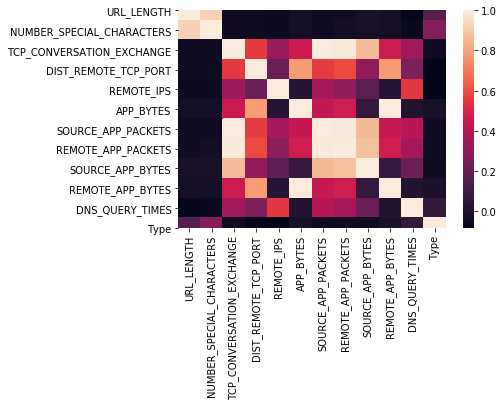

In [27]:
sns.heatmap(corr_matrix_mod1)

In [28]:
websites.drop(columns= "TCP_CONVERSATION_EXCHANGE", inplace = True)

In [29]:
corr_matrix_mod2 = websites.corr()

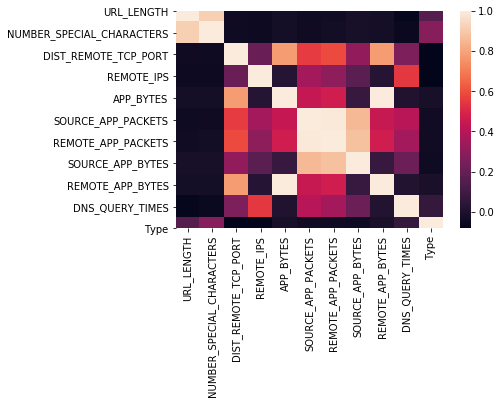

In [30]:
sns.heatmap(corr_matrix_mod2)

In [38]:
#websites.drop(columns= "REMOTE_APP_BYTES", inplace = True)

In [35]:
corr_matrix_mod3 = websites.corr()

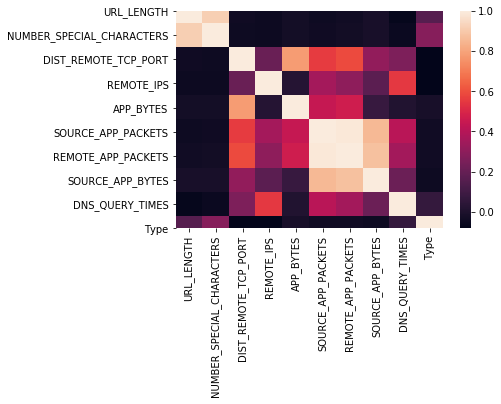

In [36]:
sns.heatmap(corr_matrix_mod3)

In [49]:
#websites.drop(columns= "REMOTE_APP_PACKETS", inplace = True)

In [45]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,700,9,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1230,17,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,39,18784,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,4278,61,129889,4.0,0


In [46]:
corr_matrix_mod4 = websites.corr()

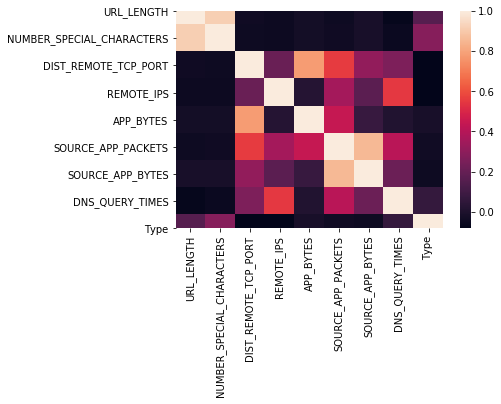

In [47]:
sns.heatmap(corr_matrix_mod4)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [48]:
websites.isna().sum() #content_length removed before because of high missing values 

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [73]:
websites.interpolate(inplace = True)

In [74]:
websites.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [75]:
websites["SERVER"]

0                        nginx
1                Apache/2.4.10
2        Microsoft-HTTPAPI/2.0
3                        nginx
4                         None
                 ...          
1776                    Apache
1777                    Apache
1778    Apache/2.2.16 (Debian)
1779          cloudflare-nginx
1780         Microsoft-IIS/8.5
Name: SERVER, Length: 1781, dtype: object

In [76]:
i = websites[((websites.DNS_QUERY_TIMES.isnull() == True) |(websites.SERVER.isnull() == True) )].index

In [77]:
websites = websites.drop(i)

In [78]:
websites.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [63]:
# Examine missing values in each column


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [53]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [66]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,700,9,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1230,17,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,39,18784,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,4278,61,129889,4.0,0


In [79]:
rename= {"ru": "RU", "Cyprus": "CY", "us": "US", "se": "SE", "United Kingdom": "GB", "[u'GB'; u'UK']": "GB"}

In [80]:
websites=websites.replace({"WHOIS_COUNTRY": rename})

In [81]:
#websites["WHOIS_COUNTRY"]=websites["WHOIS_COUNTRY"].apply(consistent)

In [82]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

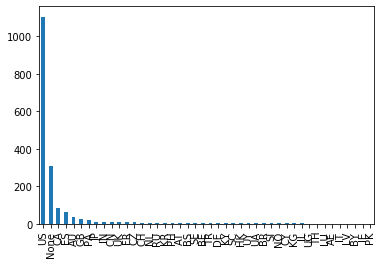

In [83]:
websites.WHOIS_COUNTRY.value_counts().plot(kind="bar")

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [85]:
countries=['US','CA','ES','AU','GB','PA','JP','IN','CN','UK','CZ']
websites['WHOIS_COUNTRY']=websites['WHOIS_COUNTRY'].apply(lambda x : x if x in countries else 'OTHER')

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [87]:
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [88]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [74]:
websites.drop(columns = "URL", inplace = True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [75]:
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [76]:
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [89]:
servers=['Microsoft','Apache','nginx']
#test.SERVER=test.SERVER.apply(for s in servers lambda x : x.replace(x,s) if s in x)
websites.SERVER=websites.SERVER.apply(lambda x : servers[0] if servers[0] in x else x)

In [90]:
websites.SERVER=websites.SERVER.apply(lambda x : servers[1] if servers[1] in x else x)
websites.SERVER=websites.SERVER.apply(lambda x : servers[2] if servers[2] in x else x)

In [ ]:
websites.SERVER=websites.SERVER.apply(lambda x : 'Others' if x not in servers else x)

In [92]:
websites.SERVER.unique()

array(['nginx', 'Apache', 'Microsoft', 'None', 'openresty/1.11.2.1',
       'Oracle-iPlanet-Web-Server/7.0', 'openresty', 'Heptu web server',
       'Pepyaka/1.11.3', 'LiteSpeed', 'tsa_c', 'GSE', 'Tengine',
       'Sun-ONE-Web-Server/6.1', 'AmazonS3', 'ATS', 'CherryPy/3.6.0',
       'Server', 'KHL', 'mw2114.codfw.wmnet', 'Jetty(9.0.z-SNAPSHOT)',
       'HTTPDaemon', 'MediaFire', 'DOSarrest', 'mw2232.codfw.wmnet',
       'Sucuri/Cloudproxy', 'mw2260.codfw.wmnet', 'mw2239.codfw.wmnet',
       'DPS/1.1.8', 'ATS/5.3.0', 'SSWS', 'YouTubeFrontEnd',
       'Squeegit/1.2.5 (3_sir)',
       'Virtuoso/07.20.3217 (Linux) i686-generic-linux-glibc212-64  VDB',
       'Yippee-Ki-Yay', 'mw2165.codfw.wmnet', 'mw2192.codfw.wmnet',
       'Proxy Pandeiro UOL', 'mw2231.codfw.wmnet', 'openresty/1.11.2.2',
       'mw2109.codfw.wmnet', 'mw2225.codfw.wmnet', 'mw2236.codfw.wmnet',
       'mw2101.codfw.wmnet', 'Varnish', 'Resin/3.1.8',
       'mw2164.codfw.wmnet', 'mw2242.codfw.wmnet', 'mw2175.codfw.wmnet',
  

In [94]:
websites.SERVER.value_counts()

Apache                643
nginx                 435
Microsoft             198
None                  175
Server                 49
                     ... 
mw2231.codfw.wmnet      1
294                     1
marrakesh 1.12.2        1
MI                      1
openresty/1.11.2.2      1
Name: SERVER, Length: 110, dtype: int64

In [95]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_PACKETS', 'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [98]:
website_dummyX=pd.get_dummies(websites[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_PACKETS', 'SOURCE_APP_BYTES', 'APP_BYTES',
       'DNS_QUERY_TIMES']],drop_first=True)
website_dummyY=pd.get_dummies(websites.Type , drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [99]:
website_dummyX.dtypes

URL_LENGTH                   int64
NUMBER_SPECIAL_CHARACTERS    int64
DIST_REMOTE_TCP_PORT         int64
REMOTE_IPS                   int64
SOURCE_APP_PACKETS           int64
                             ...  
WHOIS_COUNTRY_JP             uint8
WHOIS_COUNTRY_OTHER          uint8
WHOIS_COUNTRY_PA             uint8
WHOIS_COUNTRY_UK             uint8
WHOIS_COUNTRY_US             uint8
Length: 136, dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(website_dummyX, website_dummyY, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [104]:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [105]:
ws_model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [106]:
from sklearn.metrics import confusion_matrix

y_pred_test = ws_model.predict(X_test)
#y_pred_test
confusion_matrix(y_test, y_pred_test)

array([[315,   3],
       [ 23,  15]])

What are your thoughts on the performance of the model? Write your conclusions below.

In [107]:
acc = (315+15)/(315+3+23+15)
acc

0.9269662921348315

In [ ]:
#accuracy of 93%

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [108]:
from sklearn.neighbors import KNeighborsClassifier


ws_kn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [109]:
y_pred = ws_kn.predict(X_test)

In [110]:
confusion_matrix(y_test, y_pred)

array([[302,  16],
       [ 15,  23]])

In [112]:
acc = (302+23)/(302+16+15+23)
acc

0.9129213483146067

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [113]:
ws_kn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [114]:
confusion_matrix(y_test, y_pred)

array([[302,  16],
       [ 15,  23]])

In [115]:
acc = (302+23)/(302+23+16+25)
acc

0.8879781420765027

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
#the higher the k, the accuracy decreases

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here